# Star Wars Survey

We're going to do a little digging into a survey on Star Wars movies. The data is a little messy, so we'll have to clean it up some.

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({'Yes':True, 'No':False})

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map({'Yes':True, 'No':False})

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
seen_list = ['seen' + str(i) for i in range(1,7)]

In [11]:
seen_list

['seen1', 'seen2', 'seen3', 'seen4', 'seen5', 'seen6']

In [12]:
new_col_dict = {}
for item, column in zip(seen_list, star_wars.columns[3:9]):
    new_col_dict[column] = item

In [13]:
star_wars.rename(columns=new_col_dict, inplace=True)

In [14]:
for column in star_wars.columns[3:9]:
    print(column)

seen1
seen2
seen3
seen4
seen5
seen6


In [15]:
for column in star_wars.columns[3:9]:
    print(star_wars[column].value_counts(dropna=False))

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen5, dtype: int64
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: seen6, dtype: int64


We gained some valuable information by printing the value counts first. It would be a tremendous pain to have to type the (very long) name of the movie six times to assign boolean values. Instead, since we can see that each column only contains the movie title and nothing else (besides NaN), we can just set the boolean to be True if the value is not null. And because we can do this same process for all six columns, we can use a loop instead of doing it one by one.

In [16]:
for column in star_wars.columns[3:9]:
    star_wars.loc[star_wars[column].notnull(), column] = True
    star_wars.loc[star_wars[column].isnull(), column] = False

In [17]:
for column in star_wars.columns[3:9]:
    print(star_wars[column].value_counts(dropna=False))

True     673
False    513
Name: seen1, dtype: int64
False    615
True     571
Name: seen2, dtype: int64
False    636
True     550
Name: seen3, dtype: int64
True     607
False    579
Name: seen4, dtype: int64
True     758
False    428
Name: seen5, dtype: int64
True     738
False    448
Name: seen6, dtype: int64


In [18]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [19]:
ranking_list = ['ranking' + str(i) for i in range(1,7)]

In [20]:
ranking_list

['ranking1', 'ranking2', 'ranking3', 'ranking4', 'ranking5', 'ranking6']

In [21]:
new_col_dict_2 = {}
for item, column in zip(ranking_list, star_wars.columns[9:15]):
    new_col_dict_2[column] = item

In [22]:
star_wars.rename(columns=new_col_dict_2, inplace=True)

In [23]:
for column in star_wars.columns[9:15]:
    print(column)

ranking1
ranking2
ranking3
ranking4
ranking5
ranking6


In [24]:
rankings = star_wars.iloc[:, 9:15].mean()

In [25]:
%matplotlib inline

<AxesSubplot:>

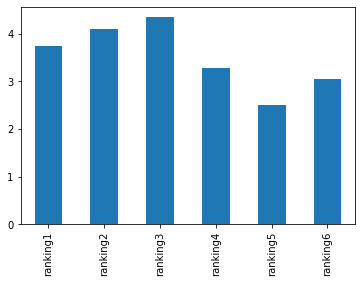

In [26]:
rankings.plot(kind='bar')

We can see the fifth movie, "The Empire Strikes Back," has the best ranking of the bunch (the rankings are from 1 to 6)! This is more impressive still because this is also the most seen movie, which in theory means it is more likely to have lower rankings since it has more competition!

In [27]:
viewings = star_wars.iloc[:, 3:9].mean()

<AxesSubplot:>

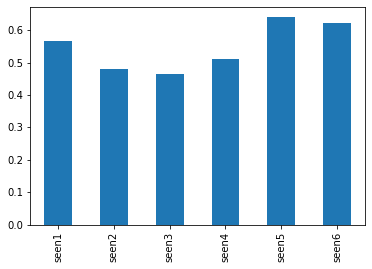

In [28]:
viewings.plot(kind='bar')

As seen here, the fifth and sixth are by far the most watched, with the second and third relatively unwatched.

Let's look at which movies are most popular with the people who consider themselves fans of the franchise.

In [29]:
star_wars.rename(columns={'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan'},inplace=True)

In [30]:
star_wars['fan'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: fan, dtype: int64

We'll consider anyone who marked True as a fan of the franchise, and anyone who marked false or did not answer as a non-fan.

In [31]:
fans = star_wars[star_wars['fan']==True]
non_fans = star_wars[star_wars['fan']!=True]

In [32]:
fan_rankings = fans.iloc[:, 9:15].mean()

<AxesSubplot:>

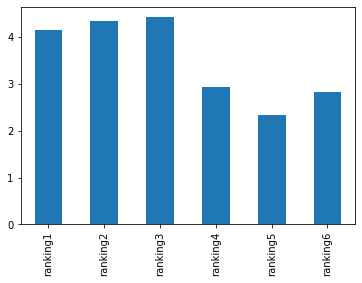

In [33]:
fan_rankings.plot(kind='bar')

Perhaps not surprisingly, the real fans are much bigger fans of the original series.

In [34]:
non_fan_rankings = non_fans.iloc[:, 9:15].mean()

<AxesSubplot:>

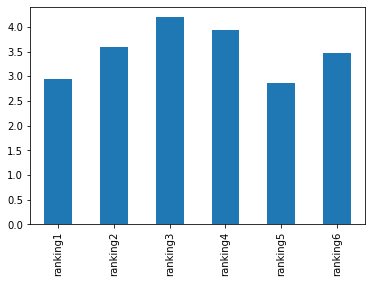

In [35]:
non_fan_rankings.plot(kind='bar')

While non fans still appreciate The Empire Strikes Back, they also appear to enjoy the Phantom Menace a fair amount.

Let's look at viewership.

In [36]:
fan_viewings = fans.iloc[:, 3:9].mean()

<AxesSubplot:>

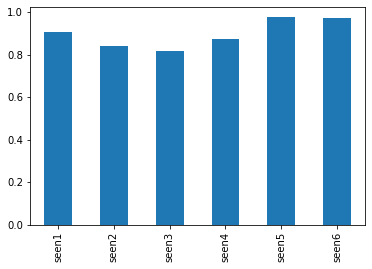

In [37]:
fan_viewings.plot(kind='bar')

In [38]:
non_fan_viewings = non_fans.iloc[:, 3:9].mean()

<AxesSubplot:>

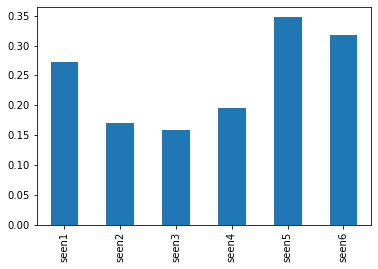

In [39]:
non_fan_viewings.plot(kind='bar')

Wow, there's a much more noticeable discrepancy on viewings. Almost 80% of fans have seen each movie, and nearly 100% have seen the final two movies. Compare that to the non fans, only 35% who have seen of Episode 5, and only about 15% who have seen Episode 3.